In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [14]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
Maya                    11
She                     11
The Outsider            11
Blood Money             11
Victory                 10
Eva                     10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [17]:
titles[titles.year // 10 == 193].year.value_counts().head(3)

1937    1186
1936    1130
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

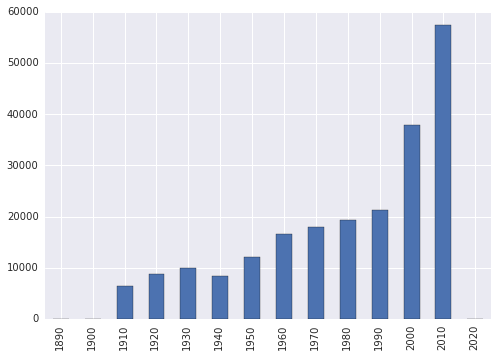

In [40]:
titles['decade'] = ((titles.year // 10) * 10)
titles.decade.value_counts().sort_index().plot(kind='bar')

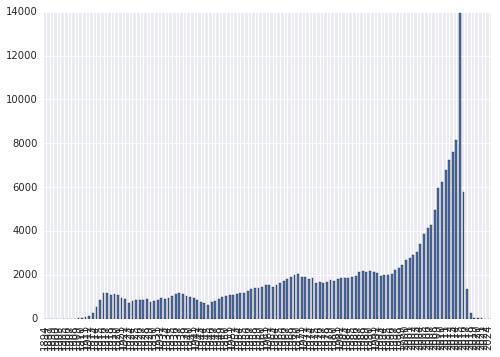

In [41]:
titles.year.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

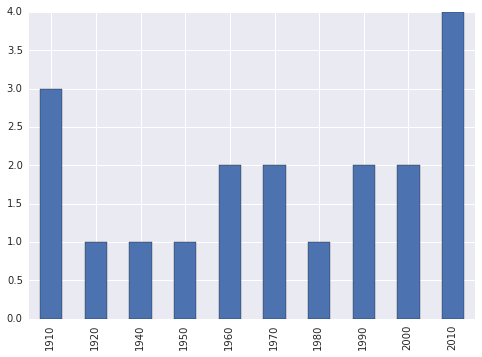

In [42]:
titles['decade'] = ((titles.year // 10) * 10)
titles[titles.title=='Hamlet'].decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

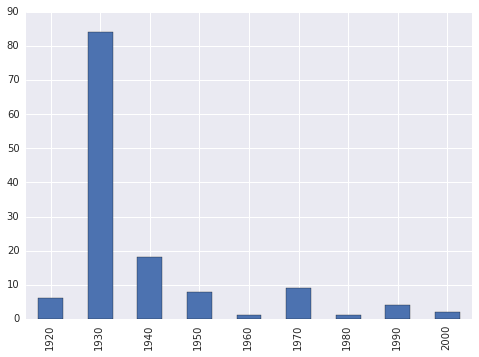

In [54]:
cast['decade'] = ((cast.year // 10) * 10)
cast[cast.character=='Rustler'].decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

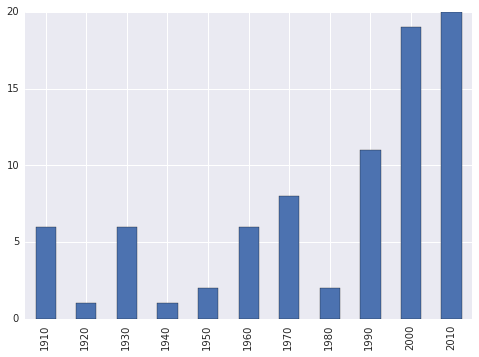

In [45]:
cast['decade'] = ((cast.year // 10) * 10)
cast[cast.character=='Hamlet'].decade.value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [12]:
cast.character.value_counts().head(11)

Himself        18916
Dancer         11076
Extra           9158
Reporter        7655
Doctor          6850
Policeman       6506
Student         6377
Bartender       6183
Nurse           6171
Party Guest     5923
Minor Role      5920
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [18]:
cast[cast.character=='Herself'].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Joan Rivers             7
Mary Jo Pehl            7
Lili?n Garc?a           6
Kareena Kapoor          5
Sally Jessy Raphael     5
Juhi Chawla             5
Caroline Rhea           5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [19]:
cast[cast.character=='Himself'].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Bill Clinton             20
Franklin D. Roosevelt    20
George W. Bush           20
Winston Churchill        20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [20]:
cast[cast.year==1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Bess Flowers        28
Harold Miller       28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     25
Tom London          24
Charles Sullivan    24
Edmund Cobb         24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [21]:
cast[cast.year==1985].name.value_counts().head(10)

Mammootty        19
Shakti Kapoor    19
Sukumari         17
Lou Scheimer     15
Aruna Irani      14
Deven Verma      13
Raj Babbar       13
Rajesh Khanna    13
Mohanlal         13
Jagdish Raj      12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

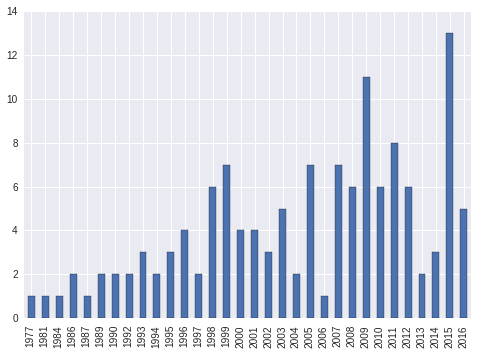

In [22]:
cast[cast.name=='Ron Jeremy'].year.value_counts().sort_index().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [59]:
c = cast[cast.character.str.startswith('Patron in')]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Club                   3
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Quiet Bar              2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [60]:
c = cast[cast.character.str.startswith('Science')]
c.character.value_counts().head(10)

Science Teacher         54
Science Student          8
Science Fair Student     8
Science Club Member      5
Science Reporter         5
Science Kid              4
Science Promo Cadet      4
Science Fair Judge       4
Science teacher          3
Science Officer          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

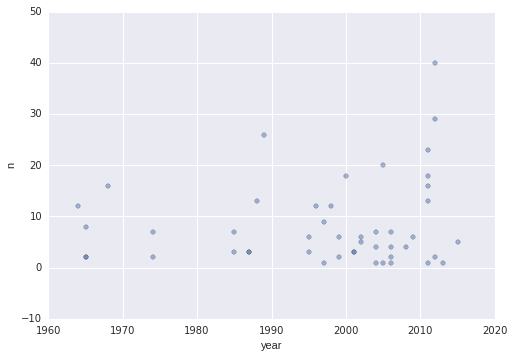

In [67]:
c=cast[cast.name=="Judi Dench"]
#c.n.value_counts().sort_index().plot(kind="bar")
c.plot(kind="scatter",x='year',y='n',alpha=0.5)

### Plot the n-values of Cary Grant's roles through his career.

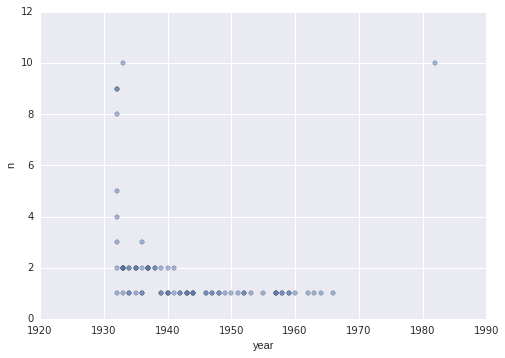

In [69]:
d=cast[cast.name=="Cary Grant"]
#c.n.value_counts().sort_index().plot(kind="bar")
d.plot(kind="scatter",x='year',y='n',alpha=0.5)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

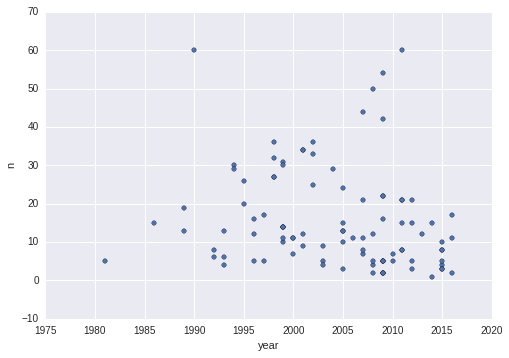

In [25]:
cast[cast.name=='Ron Jeremy'].plot(kind='scatter',x='year',y='n')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [28]:
cast[(cast.year//10==195)&(cast.n==1)].type.value_counts()

actor      6389
actress    2813
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [29]:
cast[(cast.year//10==195)&(cast.n==2)].type.value_counts()

actress    4405
actor      4382
dtype: int64